In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

import botorch
import torch


# UCB-based methods

In [2]:

all_regrets_1 = []
all_regrets_2 = []
all_regrets_3 = []
all_regrets_4 = []
all_regrets_5 = []
all_regrets_6 = []

run_list = np.arange(10)

for itr in run_list:
    policy = "ucb"
    mu = 10
    m = 20
    init_size = 5
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
            "_m_" + str(m) + "_mu_" + str(mu) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - values
    all_regrets_1.append(values_acc)

    policy = "ucb"
    mu = 10
    m = 20
    init_size = 5
    method = "baseline_no_update"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
            "_m_" + str(m) + "_mu_" + str(mu) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_2.append(values_acc)
    

    policy = "ucb"
    mu = 10
    m = 20
    init_size = 5
    method = "baseline_only_update_std"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
            "_m_" + str(m) + "_mu_" + str(mu) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_3.append(values_acc)

    
    policy = "ucb"
    batch_size = 10
    init_size = 5
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
                "_batch_size_" + str(batch_size) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_4.append(values_acc)
    

    policy = "ucb"
    batch_size = 10
    init_size = 5
    method = "baseline_no_update"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
                "_batch_size_" + str(batch_size) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_5.append(values_acc)
    

    policy = "ucb"
    batch_size = 10
    init_size = 5
    method = "baseline_only_update_std"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
                "_batch_size_" + str(batch_size) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_6.append(values_acc)

all_regrets_1_np = np.array(all_regrets_1)
all_regrets_2_np = np.array(all_regrets_2)
all_regrets_3_np = np.array(all_regrets_3)
all_regrets_4_np = np.array(all_regrets_4)
all_regrets_5_np = np.array(all_regrets_5)
all_regrets_6_np = np.array(all_regrets_6)

all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)
all_regrets_3_np_mean = np.mean(all_regrets_3_np, axis=0)
all_regrets_4_np_mean = np.mean(all_regrets_4_np, axis=0)
all_regrets_5_np_mean = np.mean(all_regrets_5_np, axis=0)
all_regrets_6_np_mean = np.mean(all_regrets_6_np, axis=0)

all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_3_np_stderr = np.std(all_regrets_3_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_4_np_stderr = np.std(all_regrets_4_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_5_np_stderr = np.std(all_regrets_5_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_6_np_stderr = np.std(all_regrets_6_np, axis=0) / (np.sqrt(len(run_list)))

all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr
all_regrets_3_np_ub = all_regrets_3_np_mean + all_regrets_3_np_stderr
all_regrets_3_np_lb = all_regrets_3_np_mean - all_regrets_3_np_stderr
all_regrets_4_np_ub = all_regrets_4_np_mean + all_regrets_4_np_stderr
all_regrets_4_np_lb = all_regrets_4_np_mean - all_regrets_4_np_stderr
all_regrets_5_np_ub = all_regrets_5_np_mean + all_regrets_5_np_stderr
all_regrets_5_np_lb = all_regrets_5_np_mean - all_regrets_5_np_stderr
all_regrets_6_np_ub = all_regrets_6_np_mean + all_regrets_6_np_stderr
all_regrets_6_np_lb = all_regrets_6_np_mean - all_regrets_6_np_stderr


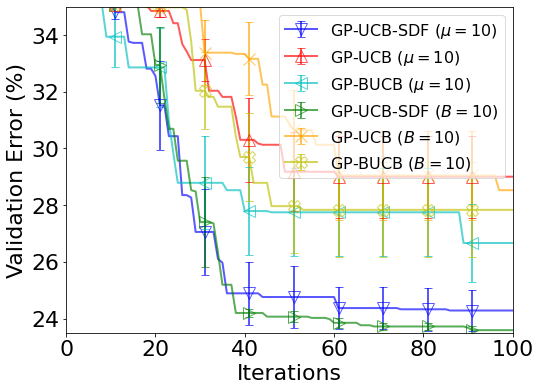

In [3]:

lw = 2.0
plt.rc('font', size=22)

plt.figure(figsize=(8, 6))
plt.rcParams["legend.framealpha"] = 0.7
plt.rcParams["legend.loc"] = "upper right"

colors = ["b", "r", "c", "g", "orange", "y", "tab:purple", \
              "tab:cyan", "tab:brown", "tab:pink", "black"]
markers = ["v", "^", "<", ">", "x", "X", "<", ">", "p", "+", "X"]

inds = np.arange(1, 200)
horizon = 100

marker_size = 12
markevery = 10
trans = 0.65
capsize = 4
plt.errorbar(inds[:horizon], 100*all_regrets_1_np_mean[:horizon], 100*all_regrets_1_np_stderr[:horizon], color=colors[0], marker=markers[0], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_2_np_mean[:horizon], 100*all_regrets_2_np_stderr[:horizon], color=colors[1], marker=markers[1], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_3_np_mean[:horizon], 100*all_regrets_3_np_stderr[:horizon], color=colors[2], marker=markers[2], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_4_np_mean[:horizon], 100*all_regrets_4_np_stderr[:horizon], color=colors[3], marker=markers[3], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_5_np_mean[:horizon], 100*all_regrets_5_np_stderr[:horizon], color=colors[4], marker=markers[4], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_6_np_mean[:horizon], 100*all_regrets_6_np_stderr[:horizon], color=colors[5], marker=markers[5], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)

plt.legend((
    r"GP-UCB-SDF ($\mu=10$)", r"GP-UCB ($\mu=10$)", r"GP-BUCB ($\mu=10$)", \
    "GP-UCB-SDF ($B=10$)", "GP-UCB ($B=10$)", "GP-BUCB ($B=10$)"
    ), prop={'size':16})


axes = plt.gca()
axes.set_xlim([0, 100])
axes.set_ylim([23.5, 35])

plt.ylabel("Validation Error (%)")
plt.xlabel("Iterations")

plt.show()


# TS-based methods

In [4]:

all_regrets_1 = []
all_regrets_2 = []
all_regrets_3 = []
all_regrets_4 = []
all_regrets_5 = []
all_regrets_6 = []

run_list = np.arange(10)

for itr in run_list:
    policy = "ts"
    mu = 10
    m = 20
    init_size = 5
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
            "_m_" + str(m) + "_mu_" + str(mu) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_1.append(values_acc)

    
    policy = "ts"
    mu = 10
    m = 20
    init_size = 5
    method = "baseline_no_update"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
            "_m_" + str(m) + "_mu_" + str(mu) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_2.append(values_acc)
    

    policy = "ts"
    mu = 10
    m = 20
    init_size = 5
    method = "baseline_only_update_std"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
            "_m_" + str(m) + "_mu_" + str(mu) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_3.append(values_acc)
    

    policy = "ts"
    batch_size = 10
    init_size = 5
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
                "_batch_size_" + str(batch_size) + ".pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_4.append(values_acc)
    

    policy = "ts"
    batch_size = 10
    init_size = 5
    method = "baseline_no_update"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
                "_batch_size_" + str(batch_size) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_5.append(values_acc)
    

    policy = "ts"
    batch_size = 10
    init_size = 5
    method = "baseline_only_update_std"
    log_file_name = "results_" + policy + "_delayed/res_iter_" + str(itr) + "_init_" + str(init_size) + \
                "_batch_size_" + str(batch_size) + ".pkl"
    if method == "baseline_no_update":
        log_file_name = log_file_name[:-4] + "_baseline_no_update.pkl"
    elif method == "baseline_only_update_std":
        log_file_name = log_file_name[:-4] + "_baseline_only_update_std.pkl"
    res = pickle.load(open(log_file_name, "rb"))
    values = res["all"]["values_censored"]
    values = np.squeeze(np.array(values))
    values_acc = 1.0 - np.maximum.accumulate(values)
    all_regrets_6.append(values_acc)

all_regrets_1_np = np.array(all_regrets_1)
all_regrets_2_np = np.array(all_regrets_2)
all_regrets_3_np = np.array(all_regrets_3)
all_regrets_4_np = np.array(all_regrets_4)
all_regrets_5_np = np.array(all_regrets_5)
all_regrets_6_np = np.array(all_regrets_6)

all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)
all_regrets_3_np_mean = np.mean(all_regrets_3_np, axis=0)
all_regrets_4_np_mean = np.mean(all_regrets_4_np, axis=0)
all_regrets_5_np_mean = np.mean(all_regrets_5_np, axis=0)
all_regrets_6_np_mean = np.mean(all_regrets_6_np, axis=0)

all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_3_np_stderr = np.std(all_regrets_3_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_4_np_stderr = np.std(all_regrets_4_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_5_np_stderr = np.std(all_regrets_5_np, axis=0) / (np.sqrt(len(run_list)))
all_regrets_6_np_stderr = np.std(all_regrets_6_np, axis=0) / (np.sqrt(len(run_list)))

all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr
all_regrets_3_np_ub = all_regrets_3_np_mean + all_regrets_3_np_stderr
all_regrets_3_np_lb = all_regrets_3_np_mean - all_regrets_3_np_stderr
all_regrets_4_np_ub = all_regrets_4_np_mean + all_regrets_4_np_stderr
all_regrets_4_np_lb = all_regrets_4_np_mean - all_regrets_4_np_stderr
all_regrets_5_np_ub = all_regrets_5_np_mean + all_regrets_5_np_stderr
all_regrets_5_np_lb = all_regrets_5_np_mean - all_regrets_5_np_stderr
all_regrets_6_np_ub = all_regrets_6_np_mean + all_regrets_6_np_stderr
all_regrets_6_np_lb = all_regrets_6_np_mean - all_regrets_6_np_stderr


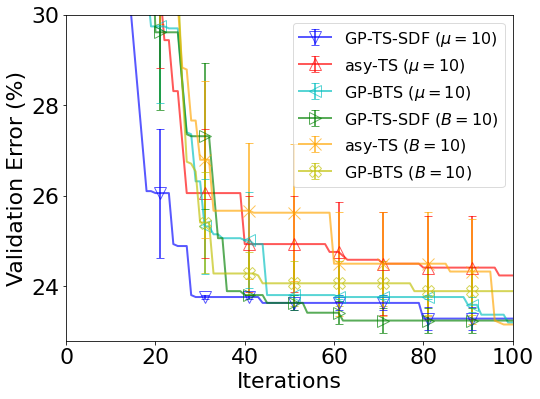

In [5]:

lw = 2.0
plt.rc('font', size=22)

plt.figure(figsize=(8, 6))
plt.rcParams["legend.framealpha"] = 0.7
plt.rcParams["legend.loc"] = "upper right"

colors = ["b", "r", "c", "g", "orange", "y", "tab:purple", \
              "tab:cyan", "tab:brown", "tab:pink", "black"]
markers = ["v", "^", "<", ">", "x", "X", "<", ">", "p", "+", "X"]

inds = np.arange(1, 200)
horizon = 100

marker_size = 12
markevery = 10
trans = 0.65
capsize = 4
plt.errorbar(inds[:horizon], 100*all_regrets_1_np_mean[:horizon], 100*all_regrets_1_np_stderr[:horizon], color=colors[0], marker=markers[0], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_2_np_mean[:horizon], 100*all_regrets_2_np_stderr[:horizon], color=colors[1], marker=markers[1], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_3_np_mean[:horizon], 100*all_regrets_3_np_stderr[:horizon], color=colors[2], marker=markers[2], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_4_np_mean[:horizon], 100*all_regrets_4_np_stderr[:horizon], color=colors[3], marker=markers[3], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_5_np_mean[:horizon], 100*all_regrets_5_np_stderr[:horizon], color=colors[4], marker=markers[4], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)
plt.errorbar(inds[:horizon], 100*all_regrets_6_np_mean[:horizon], 100*all_regrets_6_np_stderr[:horizon], color=colors[5], marker=markers[5], linewidth=lw, markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none', errorevery=markevery, markevery=markevery)

plt.legend((
    r"GP-TS-SDF ($\mu=10$)", r"asy-TS ($\mu=10$)", r"GP-BTS ($\mu=10$)", \
    "GP-TS-SDF ($B=10$)", "asy-TS ($B=10$)", "GP-BTS ($B=10$)"
    ), prop={'size':16})


axes = plt.gca()
axes.set_xlim([0, 100])
axes.set_ylim([22.8, 30])

plt.ylabel("Validation Error (%)")
plt.xlabel("Iterations")

plt.show()
